# 결측치 (missing value)
- 누락된 값, 비어있는 값
- Na값이 빈 값이면 1) Na 날릴 수도 있고 ( 기준이 있어야 한다.) 2) 채울수도 있다. (어떻게 채울것이냐)

In [68]:
import pandas as pd
import numpy as np

In [69]:
df = pd.DataFrame({'이름':['홍길동','김영희','김철수'],
                  '성적':[100,80,np.nan],
                  '등급':['A',np.nan,'B']})
df

,이름,성적,등급
0,홍길동,100.0,A
1,김영희,80.0,NaN
2,김철수,NaN,B


In [70]:
# 결측치 확인 방법 
df.isnull().sum()

이름    0
성적    1
등급    1
dtype: int64

# 결측치 제거방법
- 1) df.dropna()로 결측치가 있는 행을 제거, subset = 원하는 변수명 작성
- => subset에 해당되는 변수에서 Nan 있는 행 제거

In [71]:
df.dropna(subset = ['성적'])
# 원본을 바꿀려면 inplace= True 옵션이 필요하다
df

,이름,성적,등급
0,홍길동,100.0,A
1,김영희,80.0,NaN
2,김철수,NaN,B


In [72]:
# 전체 모든 na 값을 다 제거한다. (현 코드에서는 원본영향 X)
df.dropna()

,이름,성적,등급
0,홍길동,100.0,A


In [73]:
# na값을 제외하고 결과를 보여준다. 
df.성적.sum()

180.0

In [74]:
df

,이름,성적,등급
0,홍길동,100.0,A
1,김영희,80.0,NaN
2,김철수,NaN,B


In [75]:
# Nan은 사칙연산 불가능
df['성적']+100

0    200.0
1    180.0
2      NaN
Name: 성적, dtype: float64

In [76]:
# Nan값 반영 안됨. 평균에서 나누기 연산도 Nan이 없는 행의 개수로 나눔
df.성적.mean()

90.0

- 숫자열 데이터 타입에서 NaN 값은 제외되어 계산된다

In [77]:
df.이름.value_counts().sum()

3

In [78]:
# 문자열 데이터, 범주형 데이터도 NaN 값은 계산이 제외된다. 
df.등급.value_counts().sum()

2

In [79]:
# 전체 데이터프레임의 행과 열은3 3,3으로 나오지만,
# 실제 컬럼을 기준으로 들어가서 값을 계산할때는 NaN은 제외되어 계산된다. 
df.shape

(3, 3)

In [80]:
exam = pd.read_csv('exam.csv')

In [81]:
#exam 데이터에서 english의 3,8,9,15 인덱스의 값에 NaN값을 넣어라
#np.nan은 넘파이에서 제공하는 NaN
exam.loc[[3,8,9,15], ['english']]= np.nan
exam

,id,nclass,math,english,science
0,1,1,50,98.0,50
1,2,1,60,97.0,60
2,3,1,45,86.0,78
3,4,1,30,NaN,58
4,5,2,25,80.0,65
5,6,2,50,89.0,98
6,7,2,80,90.0,45
7,8,2,90,78.0,25
8,9,3,20,NaN,15
9,10,3,50,NaN,45


In [82]:
# NaN값 확인
exam.isna().sum()

id         0
nclass     0
math       0
english    4
science    0
dtype: int64

In [83]:
# 여기서 평균은 NaN값을 반영하지 않는다. 
exam.english.mean()

81.625

# Na 값을 대체하는 방법 : fillna()
- fillna()를 사용하면 대체하는 값을 넣을 수 있다. 
- 결측치에 대해서 0을 집어 넣는 경우...- > 맞는 방법일까? Well....

In [84]:
# english 변수에서 na값을 0으로 대체하자
exam['english']= exam['english'].fillna(0)
exam.english.mean()
# 평균값이 81.625에서 65.3으로 바뀌었다! 

65.3

- 결측치 대처는 도메인지식과 분석가의 판단이 필요
- 결측치는 최대한 어떻게 대체해서 머신에게 학습하냐에 따라 머신러닝의 평가지표값이 달라진다. 

In [85]:
exam.loc[[3,8,9,15], ['english']]= np.nan
exam['english'] = exam['english'].fillna(81.6)
exam.english.mean()

81.62

# 이상치 (anomaly)
- 이상치도 두 가지로 구분
- 진짜 정상적인 이상치 일수도 있고, 논리적으로 말도 안되는 값일 수도 있다. 
- 예를 들어 고객장바구니 데이터를 보는데 주문 금액이 마이너스이다? 
- 이상치 일수도 있고 반품을 통한 마이너스 일수도 있다. 
- 즉, 이상치도 분석가가 판단을 잘해야 하는데, 도메인 지식이 중요하다
- 그럼 이상치는 무엇을 기준으로 보는가?
- IQR 을 통해 이상치 판단을 통계적으로 확인할 수 있다. 

In [104]:
mpg = pd.read_csv('mpg.csv')

In [87]:
mpg.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
category        0
dtype: int64

<AxesSubplot:ylabel='cty'>

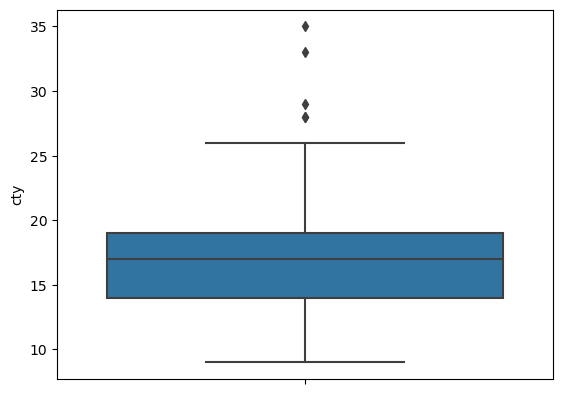

In [88]:
import seaborn as sns
sns.boxplot(data= mpg, y = 'cty')

# BoxPlot
- 박스 아래 밑변 : 1사분위수 Q1 , 하위 25% 위치값
- 박스 중간 변 : 2 사분위수 Q2, 중앙값 50%
- 박스 위 밑변 : 3사분위수 Q3, 하위 75% 
- 아랫수염 : 0~25% 내에 해당하는 값
- 윗수염 : 75~100% 내에 해당하는 값
- 이상치 : 윗수염, 아랫수염 밖의 극단치들. Q1, Q3에서 1.5IQR만큼 떨어진 값을 넘어선 값

# IQR
- IQR = Q3-Q1
- quantile()사용하여 구한다

In [89]:
p25 = mpg['cty'].quantile(0.25)
p25

14.0

In [90]:
p75= mpg['cty'].quantile(0.75)
p75

19.0

In [91]:
iqr = p75- p25
iqr

5.0

In [92]:
# UpperFence = 위 상한선 =  p75  + 1.5 * iqr
p75 + 1.5 * iqr

26.5

In [93]:
# LowerFence = 아래 상한선 = p25-1.5 * iqr
p25 - 1.5 * iqr

6.5

In [94]:
# 이상치에 해당되는 값들 계산
np.where((mpg['cty']<6.5) | (mpg['cty']>26.5))

(array([ 99, 196, 212, 221, 222], dtype=int64),)

In [107]:
mpg['cty']= np.where((mpg['cty']<6.5) | (mpg['cty']>26.5), np.nan, mpg['cty'])

In [96]:
mpg.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             5
hwy             0
fl              0
category        0
dtype: int64

In [97]:
mpg_1 = mpg.dropna()

In [98]:
#dropna는 원본변경 가능. na가 있는 행들 제거
mpg_1.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             0
fl              0
category        0
dtype: int64

<AxesSubplot:ylabel='cty'>

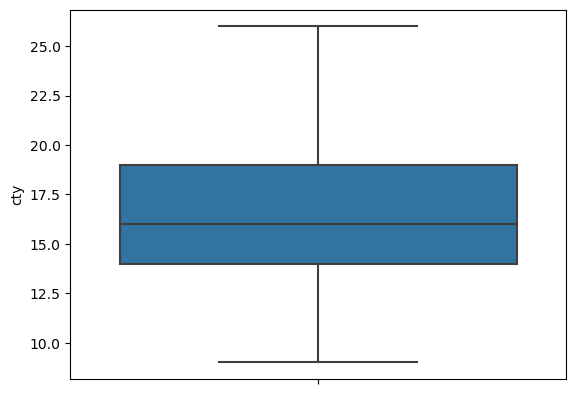

In [99]:
# 이상치 사라졌다. 
sns.boxplot(data = mpg_1, y = 'cty')

In [100]:
mpg_1.cty.mean() # 이상치 제거 후

16.558951965065503

In [109]:
mpg = pd.read_csv('mpg.csv')
mpg.cty.mean() # 이상치 제거 전

16.858974358974358

# 행단위 추출
- query : 조건문을 이용하여 추출
- loc : 인덱스 기준으로 행 데이터 추출
- iloc : 행번호 기준으로 행 데이터 추출

In [110]:
mpg.loc[0]

manufacturer        audi
model                 a4
displ                1.8
year                1999
cyl                    4
trans           auto(l5)
drv                    f
cty                   18
hwy                   29
fl                     p
category         compact
Name: 0, dtype: object

In [111]:
mpg.loc[[0,1,2]]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [112]:
mpg.iloc[0]

manufacturer        audi
model                 a4
displ                1.8
year                1999
cyl                    4
trans           auto(l5)
drv                    f
cty                   18
hwy                   29
fl                     p
category         compact
Name: 0, dtype: object

In [113]:
mpg.iloc[[0,1,2]]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [115]:
# loc, iloc 비교
mpg_sp = mpg.loc[[0,2,4,6,8]]
mpg_sp

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact


In [117]:
mpg_sp.loc[4] 
# 위 데이터에서 인덱스가 4인 데이터에 해당하는 행 가져옴

manufacturer        audi
model                 a4
displ                2.8
year                1999
cyl                    6
trans           auto(l5)
drv                    f
cty                   16
hwy                   26
fl                     p
category         compact
Name: 4, dtype: object

In [118]:
mpg_sp.iloc[4]
# 위 데이터에서 4+1번째 행에 해당하는 데이터 가져옴

manufacturer          audi
model           a4 quattro
displ                  1.8
year                  1999
cyl                      4
trans             auto(l5)
drv                      4
cty                     16
hwy                     25
fl                       p
category           compact
Name: 8, dtype: object